<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Dose_TM_Bi-gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the processed vaccination file
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,0,2021-03-28 23:59:54,22 CVS locations show #CovidVaccine slots in C...,22 cvs locations show covidvaccine slots in ca...,VaccineCa,Unknown,['CovidVaccine'],Unknown
1,1,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,2020 we will be back to normal as soon as we h...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
2,2,2021-03-28 23:59:24,Amazingly if you open up the spots for younger...,amazingly if you open up the spots for younger...,AureliaCotta,Toronto,"['topoli', 'onpoli', 'COVID19Vaccine']",Canada
3,3,2021-03-28 23:58:40,@aussieinTO Exactly! Why are they hoarding vac...,aussieinto exactly why are they hoarding vacci...,JeanCourtney413,Retired Teacher/Public Servant,"['CovidVaccine', 'fordfiasco']",Unknown
4,4,2021-03-28 23:57:24,24 hours post-first #covid_19 shot &amp; thank...,24 hours postfirst covid_19 shot amp thankfull...,SumunLPendakur,Los Angeles,"['covid_19', 'vaccinated']",United States
...,...,...,...,...,...,...,...,...
178132,178132,2021-04-25 19:55:35,Double jabbed and feeling very happy (albeit i...,double jabbed and feeling very happy albeit it...,bears_katy,Unknown,"['COVID19Vaccine', 'GetVaccinated', 'FullyVacc...",Unknown
178133,178133,2021-04-25 19:55:12,Northlands is so busy right now you’d think th...,northlands is so busy right now youd think the...,Sharpie780,Edmonton,"['COVIDtesting', 'COVIDvaccine', 'COVIDab']",Canada
178134,178134,2021-04-25 19:55:03,#Covidvaccine clinics for eligible people with...,covidvaccine clinics for eligible people with ...,dudleymbc,Dudley,['Covidvaccine'],United Kingdom
178135,178135,2021-04-25 19:54:37,Guess who’s fully vaccinated now? 💉 #CovidVacc...,guess whos fully vaccinated now covidvaccine m...,enriquevbjr,California,"['CovidVaccine', 'Moderna', 'VaccinesWork', 'v...",United States


In [ ]:
import nltk
nltk.download()

In [3]:
# Importing packages
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize 
tokens=[]
bigram = Phrases()

# Iterating through cleaned tweets
for a in df["CleanedTweet"]:
  try:
    if pd.isnull(a) or float(a):
      tokens.append("")
  except ValueError:
# Converting into tokens   
      tokens.append(word_tokenize(a))

# Calling bi-grams API to fetch the bi-grams
bigram_data = models.Phrases(tokens, min_count=30)
bigrams_mod_val = models.phrases.Phraser(bigram_data)




In [4]:

import operator
dictionary={}
count=0
bigrams=[]
# Creating the dictionary as key value pairs for each bi and its corresponding frequency count
for id in range(len(tokens)):
    for token in bigrams_mod_val[tokens[id]]:
        if '_' in token:
          bigrams.append(token)
          tokens[id].append(token)
# Setting key value dictionary           
for keyVal in bigrams:
  if keyVal in dictionary:
    dictionary[keyVal]+=1
  else:
    dictionary[keyVal]=1

# Returns the final list of bigram Map.    
data= sorted(dictionary.items(),key=operator.itemgetter(1),reverse=True)


In [5]:
data[:30000]

[('got_my', 5803),
 ('thank_you', 5790),
 ('fully_vaccinated', 4672),
 ('if_you', 4621),
 ('show_covidvaccine', 4415),
 ('slots_in', 4411),
 ('first_dose', 3746),
 ('will_be', 3680),
 ('my_first', 3632),
 ('i_am', 3631),
 ('covid_19', 3363),
 ('just_got', 3000),
 ('have_been', 2685),
 ('cvs_locations', 2349),
 ('side_effects', 2199),
 ('my_second', 2114),
 ('second_dose', 2094),
 ('rite_aids', 1805),
 ('has_been', 1675),
 ('2nd_dose', 1604),
 ('so_far', 1492),
 ('1st_dose', 1463),
 ('i_feel', 1452),
 ('more_than', 1412),
 ('this_morning', 1394),
 ('if_youre', 1392),
 ('covidvaccine_slots', 1250),
 ('should_be', 1217),
 ('my_2nd', 1212),
 ('a_little', 1196),
 ('at_least', 1177),
 ('covid19vaccine_covid19on', 1154),
 ('those_who', 1139),
 ('able_to', 1023),
 ('second_shot', 1020),
 ('johnson_amp', 1005),
 ('we_need', 977),
 ('a_few', 977),
 ('an_appointment', 975),
 ('this_week', 931),
 ('find_out', 878),
 ('blood_clots', 847),
 ('a_lot', 844),
 ('learn_more', 842),
 ('have_received', 84

In [6]:
labels = ['Bigram_Words', 'Frequency']
df = pd.DataFrame.from_records(data[:30000], columns=labels)
df

,Bigram_Words,Frequency
0,got_my,5803
1,thank_you,5790
2,fully_vaccinated,4672
3,if_you,4621
4,show_covidvaccine,4415
...,...,...
8496,redamor_,1
8497,cipla_global,1
8498,salina_duncan_p,1
8499,forensic_evidence,1


In [7]:
# Importing libraries for visual word cloud map

import numpy as np
from PIL import Image
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



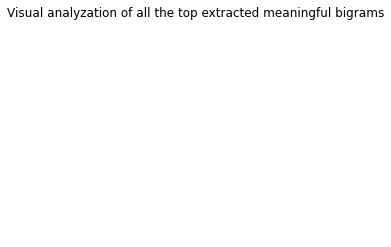

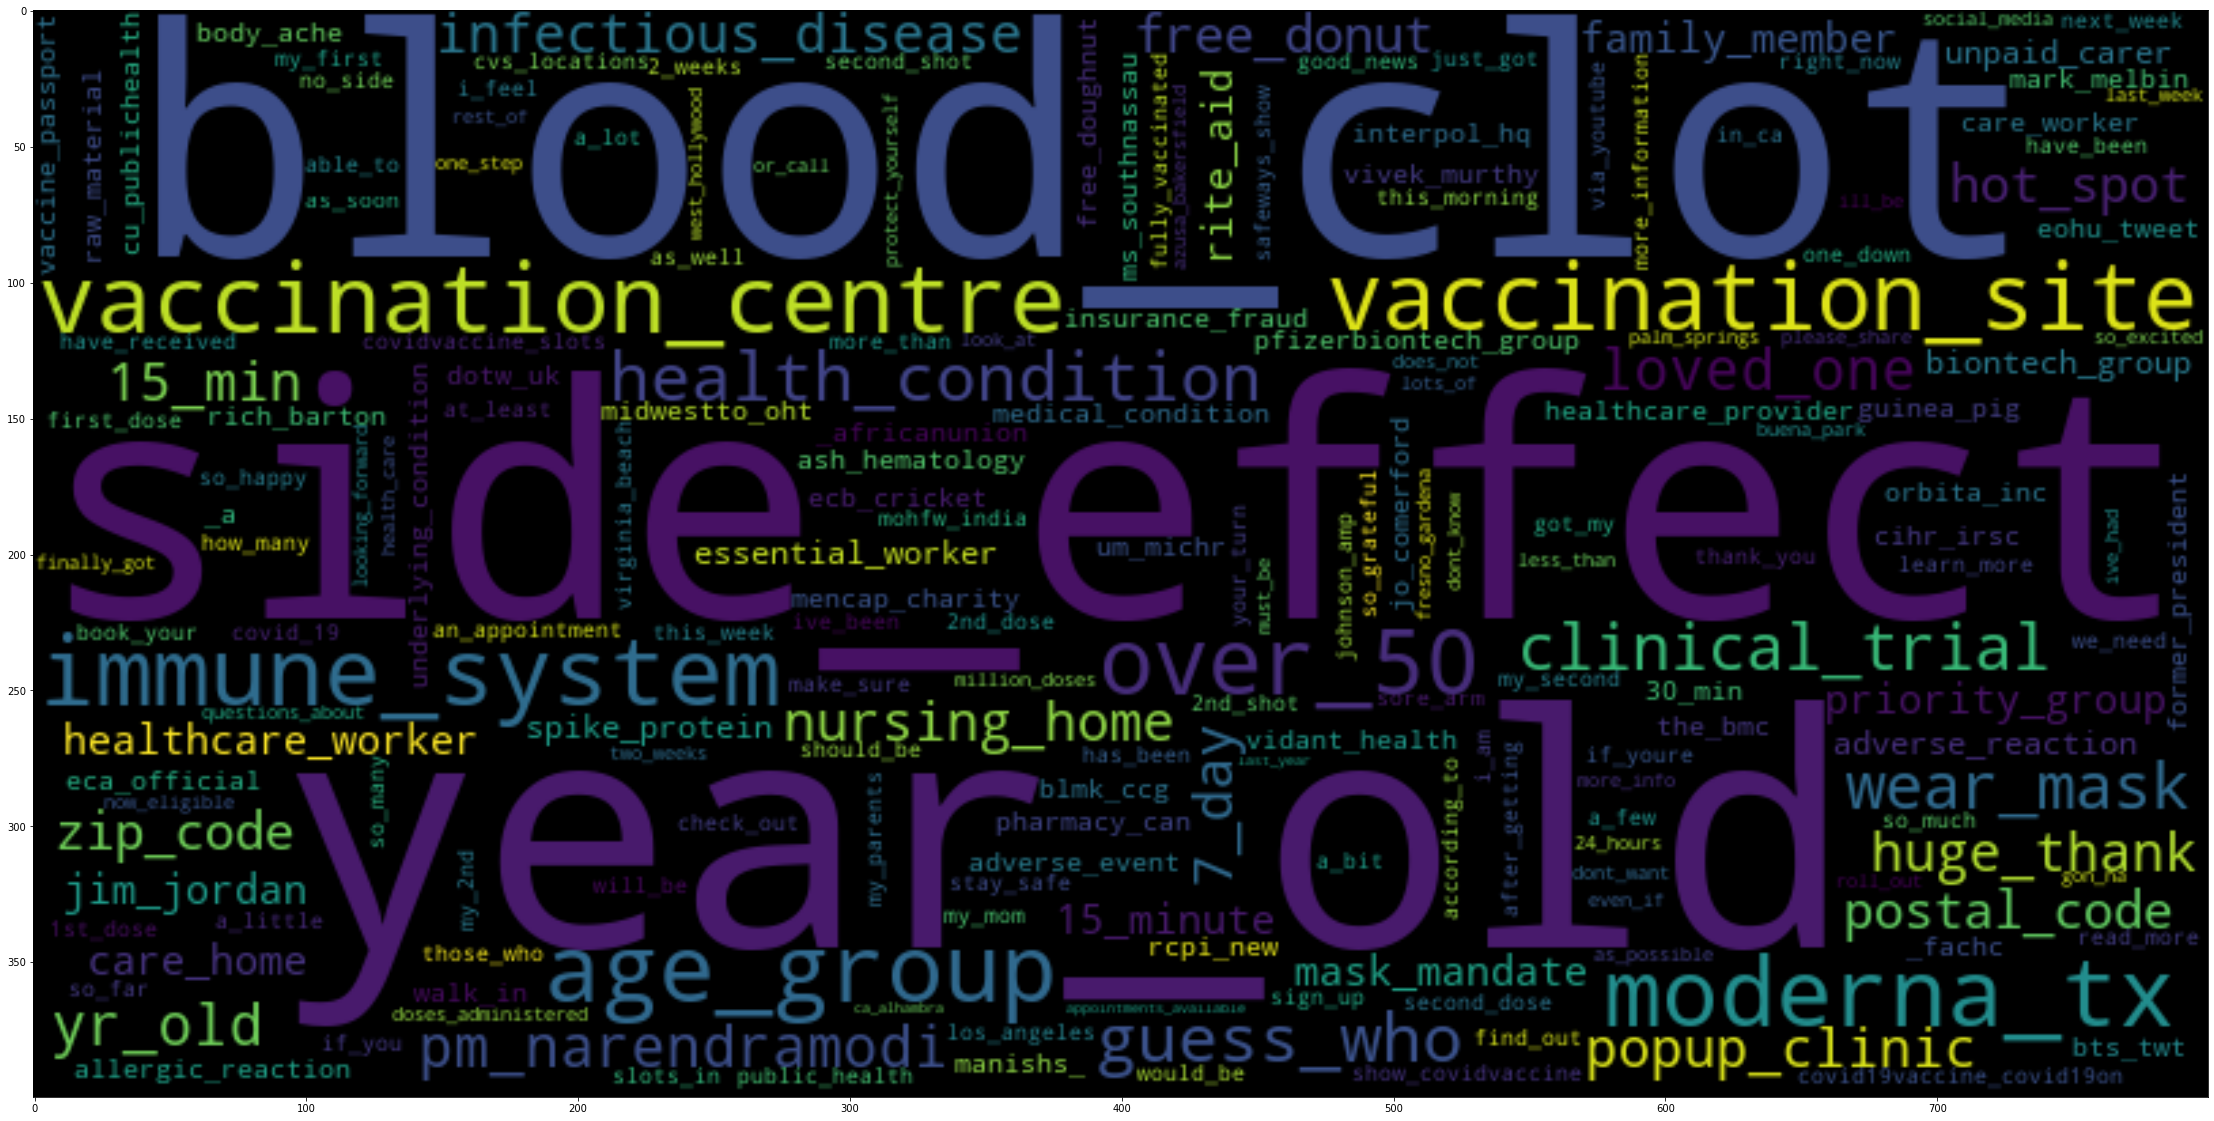

In [8]:
# Python program to generate WordCloud for column Bigrams

textData = " ".join(review for review in df.Bigram_Words.astype(str))

# removing stopwords that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["hotvickkrishna_need","leaving_maga","cant_wait"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(textData)

# Display the generated image matplotlib way:
plt.axis("off")
plt.title("Visual analyzation of all the top extracted meaningful bigrams")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [9]:
# Analysing the bi-grams and manually reading the bi-grams and categorizing them as First Dose , Second Dose and yet to be vaccinated
First_Dose =[ 'first_dose', 'got_first','receives_first','took_first','due_second','single_dose','wearamask_firstdosedone','doses_administered','administering_doses'] # First Dose declaring manually for analysis
Second_Dose =['received_second','second_dose','two_doses'] # Second Dose declaring manually for analysis
Appointments_Scheduled = ['schedule_appointment','appointment_saturday','appointments_newly','appointment_online'] # Scheduled appointments declaring manually for analysis

First_Dose_Count   = df.loc[df['Bigram_Words'].isin(First_Dose), 'Frequency'].sum()
Second_Dose_Count  = df.loc[df['Bigram_Words'].isin(Second_Dose), 'Frequency'].sum()
Appointments_Count = df.loc[df['Bigram_Words'].isin(Appointments_Scheduled), 'Frequency'].sum()

# initialize list of lists
Vaccination_Doses = [['First Dose', First_Dose_Count], ['Second Dose', Second_Dose_Count], ['Scheduled', Appointments_Count]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Vaccination_Doses, columns = ['Vaccination_Doses', 'Population_Count'])
df['percent_count'] = (df['Population_Count'] / df['Population_Count'].sum()) * 100
df['percent_count']=df['percent_count'].round(decimals=2)
percentCount= df['percent_count'].tolist()  
vaccinationDoses= df['Vaccination_Doses'].tolist()
# print dataframe.
df


,Vaccination_Doses,Population_Count,percent_count
0,First Dose,4382,64.46
1,Second Dose,2273,33.44
2,Scheduled,143,2.10


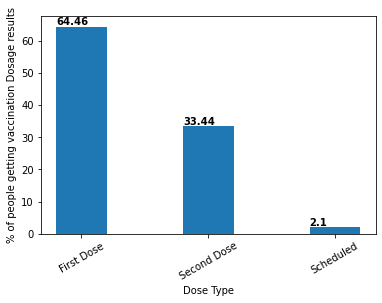

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# set the initial x-values to what you are wanting to plot
x=vaccinationDoses
y=percentCount

bars = plt.bar(x, height=y, width=.4)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]

plt.xlabel('Dose Type')
plt.ylabel('% of people getting vaccination Dosage results')
plt.xticks(xlocs, xlabs)
plt.xticks(rotation=30, horizontalalignment="center")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .5, yval, weight="bold")

plt.show()
plt.savefig('VaccineDosage.png', dpi=300)